# Interactive Break: Filtering

<div class="alert alert-block alert-success">

<b>Outline: </b>
* The mean and median filter are example of denoising filters.
    * Those filter work on a local neighborhood, called structural element/neighborhood/footprint.
* The 'right' (/least worst) filter for the job depends on the noise characteristics.
* Thresholding can be used to extract a structure of interest.
    * The lower threshold and uppter threshold value define a threshold.
    * There are automated threshold approaches that define upper and lower threshold values automatically and robustly.
</div> 

<div class="alert alert-block alert-info">
    
<b>Theory</b>

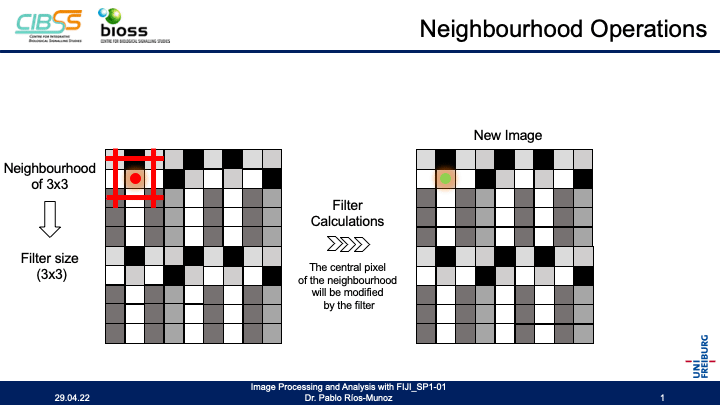
</div>

<div class="alert alert-block alert-info">
    
<b>Theory</b>

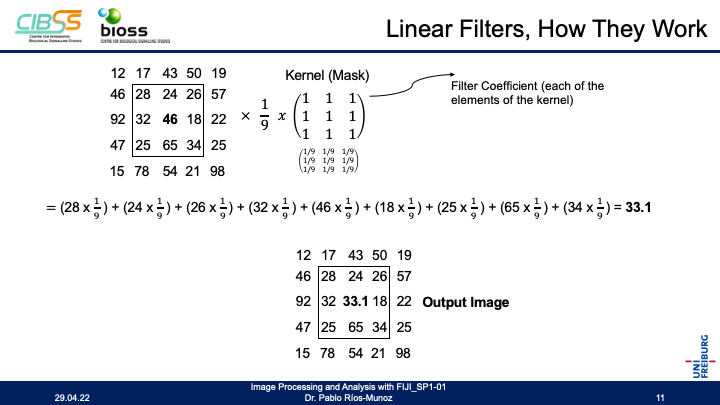</div>

<div class="alert alert-block alert-info">
    
<b>Theory</b>
    
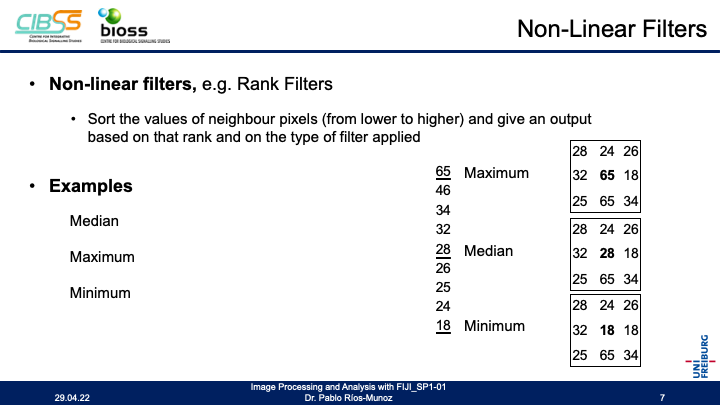

---

<div class="alert alert-block alert-warning">
<b>Task:</b> <br></br>
    
* The goal is to denoise a image with salt & pepper noise:
    * minimum value – pepper – black pixels; maximum value – salt – white pixels
* A threshold on the denoised image should extract the circular elements in the center of the image:

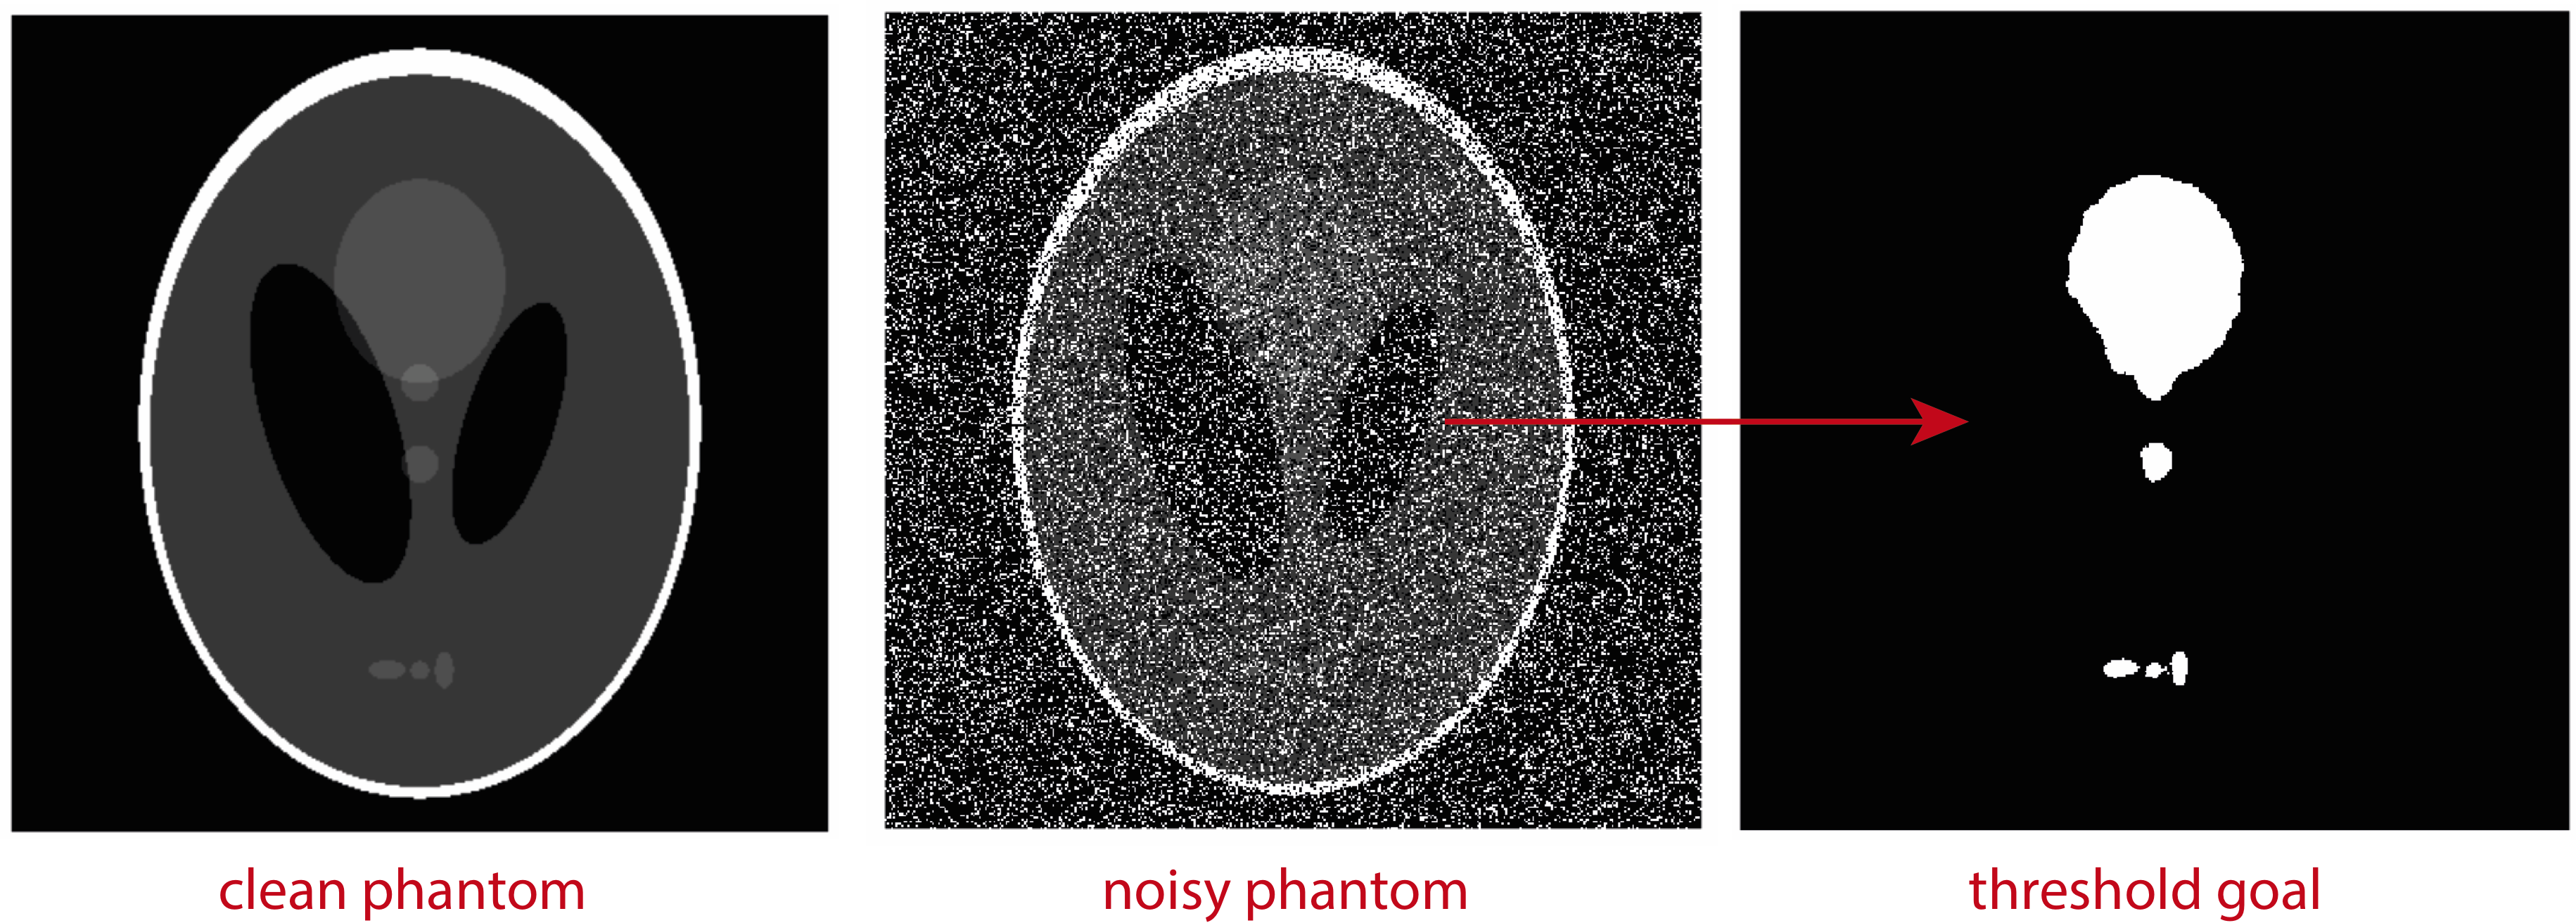


*  Explore the parameters at the bottom of the widgets. They may need a wait time up to 30sec to show up.
</div>

In [ ]:
%matplotlib notebook
from widgetFiltering import RankFilterWidget
myWidget = RankFilterWidget()


<div class="alert alert-block alert-info">
    
<b>How to run the median/mean filter in python?</b>


There are multiple packages that provide that function, for example, <code>scikit-image</code> or  <code>itk</code>.

https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.mean <br>
https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.median<br>
https://itk.org/Doxygen/html/classitk_1_1MedianImageFilter.html<br>
https://itk.org/Doxygen/html/classitk_1_1MeanImageFilter.html<br>
    
</div>

In [ ]:
from skimage.morphology import square, disk, diamond
from skimage.filters.rank import mean, median
from skimage import data
import matplotlib.pyplot as plt

image = data.cat()[:, :, 0] # only select red (first) channel of RGB image

neighborhood_disk = disk(radius=10)
mean_filtered_disk = mean(image, footprint=neighborhood_disk)

neighborhood_square = square(width=10)
mean_filtered_square = mean(image, footprint=neighborhood_square)

neighborhood_diamond = diamond(radius=10)
median_filtered_diamond = median(image, footprint=neighborhood_diamond)

# plotting
plt.figure(figsize=(12,2))
plt.subplot(141)
plt.imshow(image)
plt.title("original image")
plt.subplot(142)
plt.imshow(mean_filtered_disk)
plt.title("mean_filtered_disk")
plt.subplot(143)
plt.imshow(mean_filtered_square)
plt.title("mean_filtered_square")
plt.subplot(144)
plt.imshow(median_filtered_diamond)
plt.title("median_filtered_diamond")
plt.show()

In [ ]:
import itk
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

image = np.mean(data.cat(), axis=2) # average all colors to get one color channel only

# filtering
mean_filtered = itk.mean_image_filter(image, radius=10)
median_filtered = itk.median_image_filter(image, radius=10)

# plotting
plt.figure(figsize=(10,2))
plt.subplot(131)
plt.imshow(image)
plt.title("original image")
plt.subplot(132)
plt.imshow(mean_filtered)
plt.title("mean-filtered image")
plt.subplot(133)
plt.imshow(median_filtered)
plt.title("median-filtered image")
plt.show()

---

<div class="alert alert-block alert-warning">
<b>Bonus Question:</b> <br>

Why does one of the filters work so well here?

Consider the type of noise that was added to the image.
</div>


In [ ]:
%run showAnswerFiltering.py